# Check system versions

In [1]:
# What version of Python do you have?
import sys
#import keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

2024-03-06 12:22:45.024305: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-06 12:22:45.059986: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 12:22:45.060028: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 12:22:45.060968: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 12:22:45.067622: I tensorflow/core/platform/cpu_feature_guar

Tensor Flow Version: 2.15.0


NameError: name 'keras' is not defined

# Deep Learning Technique for data ectraction from radar chart image

## Training code

Num GPUs Available:  0
Length of data: 200
Length of labels: 200
Training data shape: (140, 256, 256, 3)
Testing data shape: (41, 256, 256, 3)
Training labels shape: (140, 6)
Testing labels shape: (41, 6)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 256, 256, 64)         1792      ['input_4[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 256, 256, 64)         36928     ['block1_conv1[0][0]']        
                                                                                     

c:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 15s 2s/step - loss: 0.7214 - mean_absolute_error: 0.5064 - val_loss: 0.1476 - val_mean_absolute_error: 0.1788 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 13s 2s/step - loss: 0.3699 - mean_absolute_error: 0.4445 - val_loss: 0.1816 - val_mean_absolute_error: 0.1801 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 13s 1s/step - loss: 0.3577 - mean_absolute_error: 0.4355 - val_loss: 0.1143 - val_mean_absolute_error: 0.1796 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 13s 1s/step - loss: 0.3011 - mean_absolute_error: 0.3867 - val_loss: 0.1179 - val_mean_absolute_error: 0.1606 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 13s 1s/step - loss: 0.2543 - mean_absolute_error: 0.3586 - val_loss: 0.0993 - val_mean_absolute_error: 0.1532 - lr: 0.0010
Epoch 7/100
9/9 [==============================] - 13s 2s/step - loss: 0.2650 - mean_absolute_error: 0.3597 - val_loss: 0.0939 - val_mean_abso

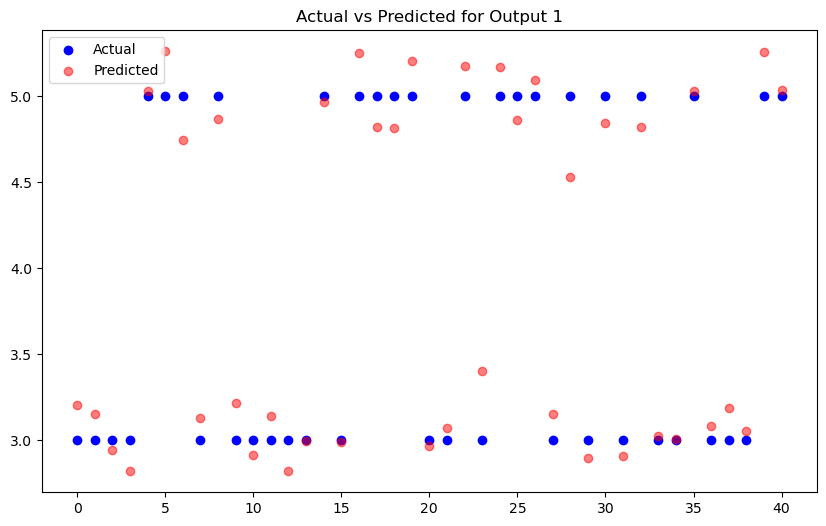

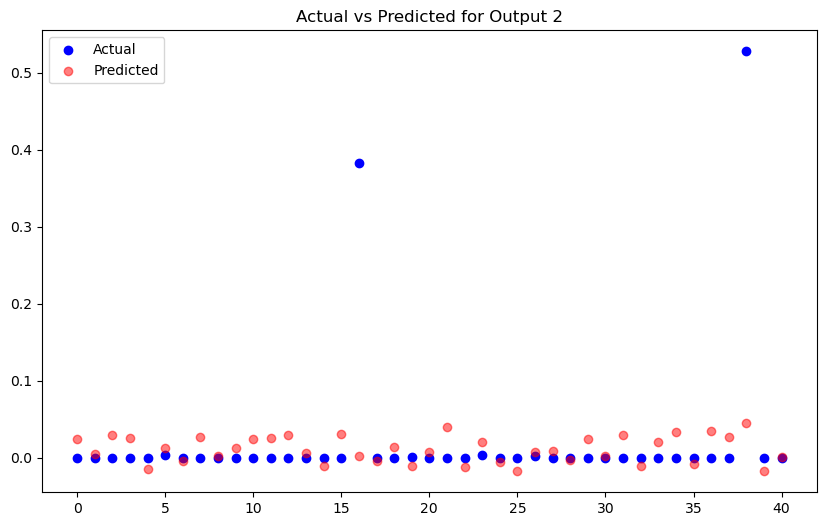

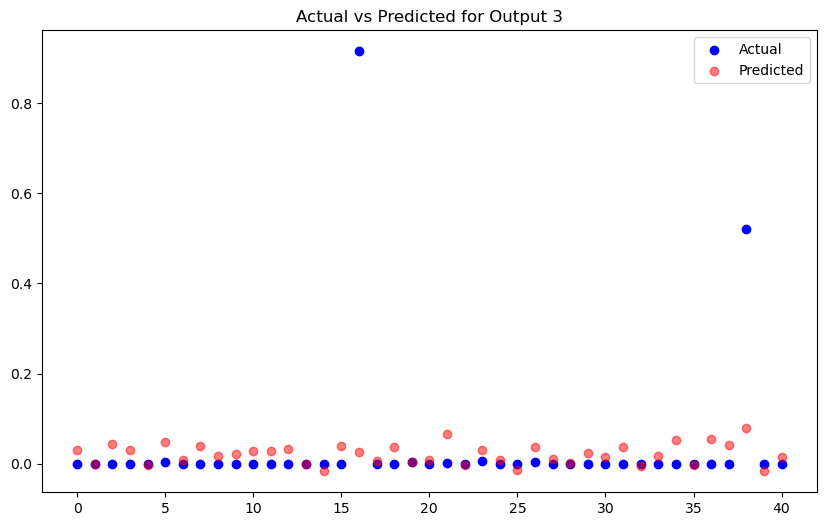

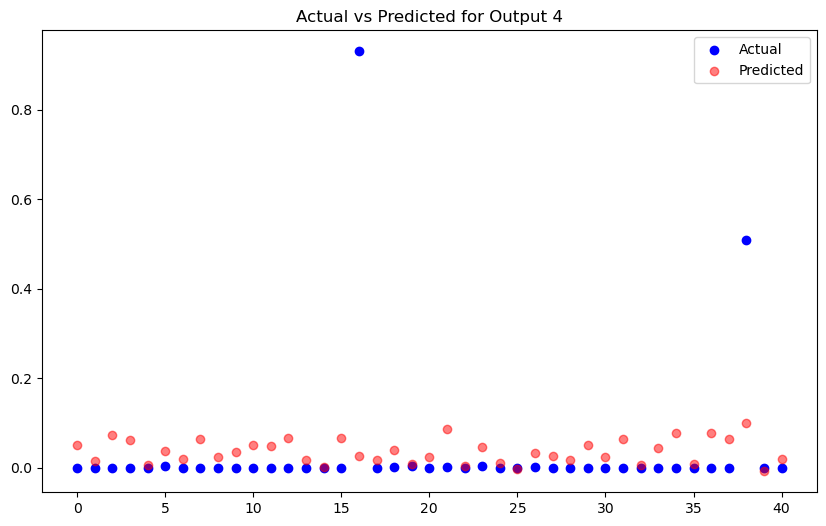

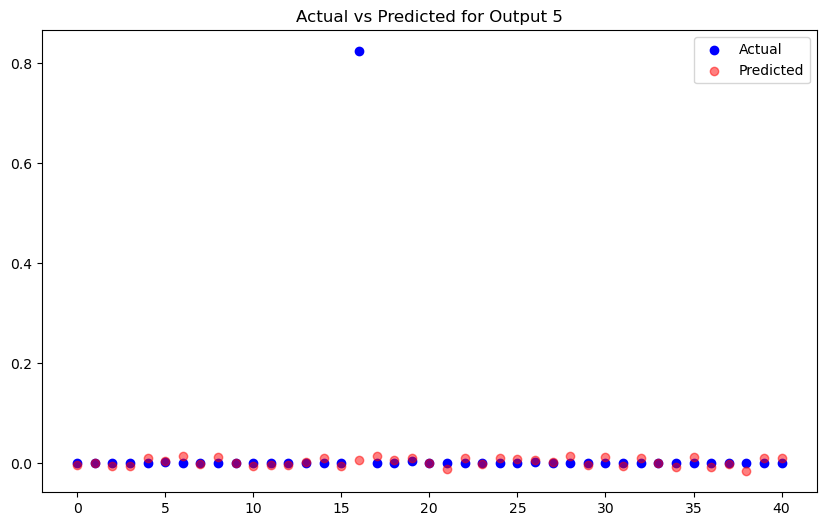

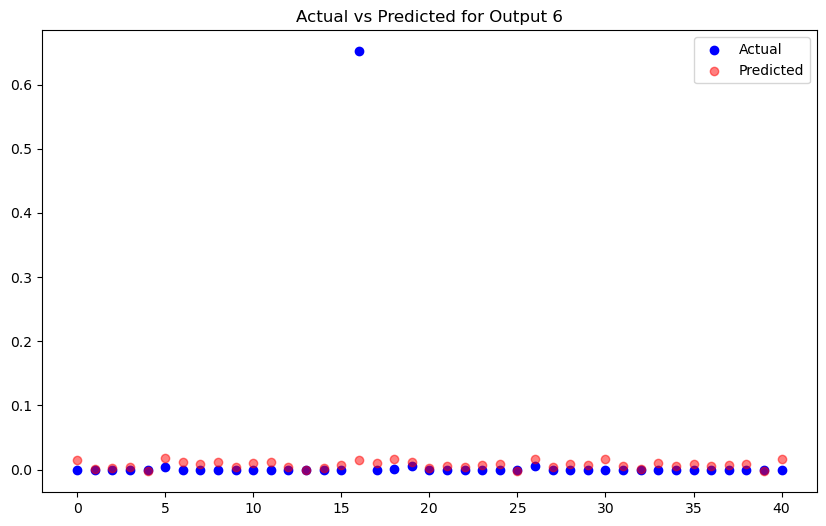

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


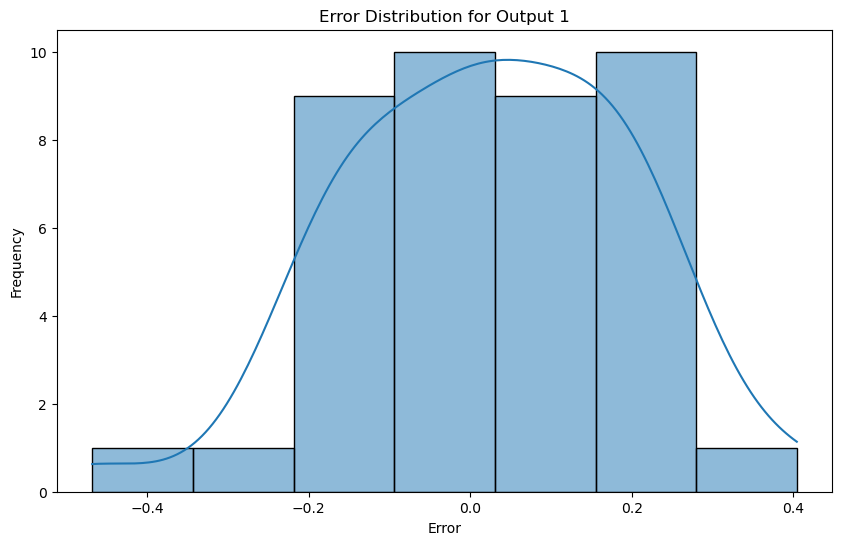

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


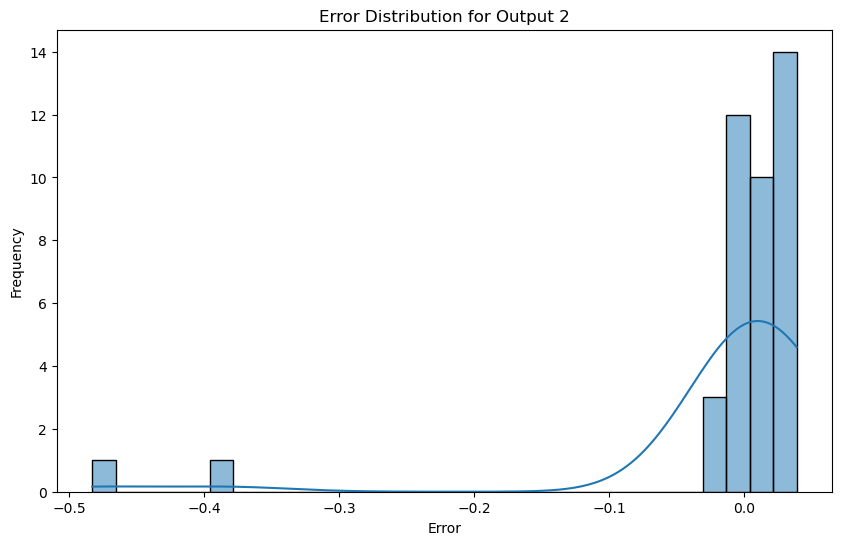

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


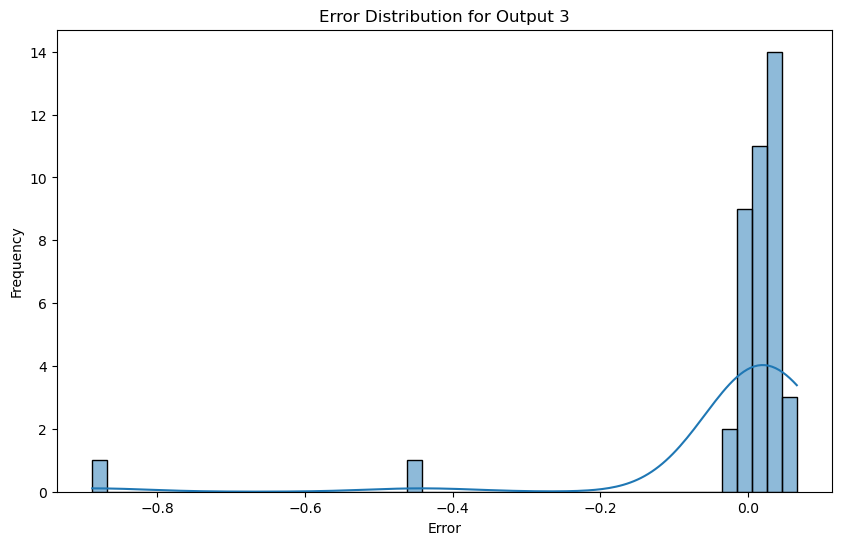

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


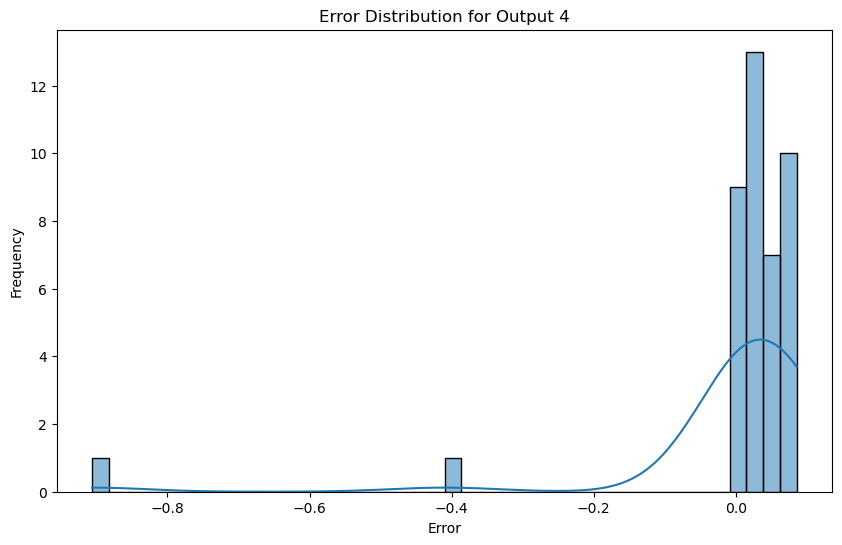

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


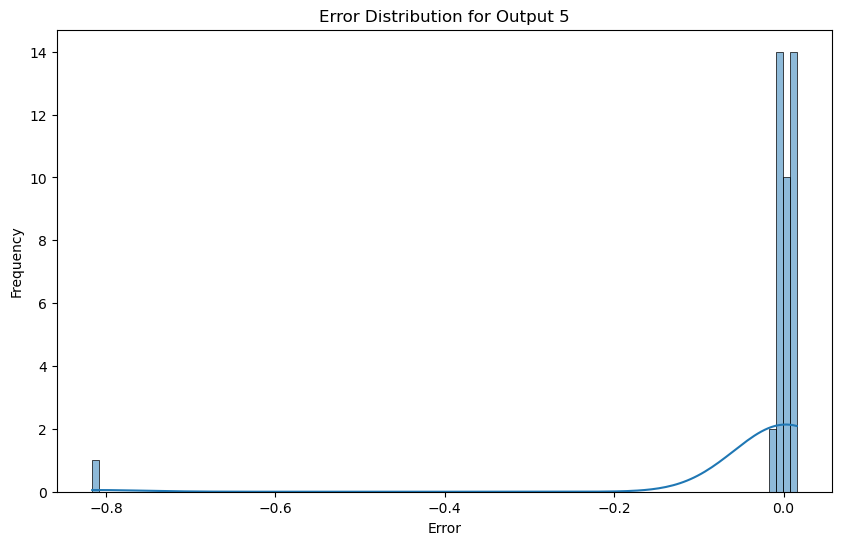

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


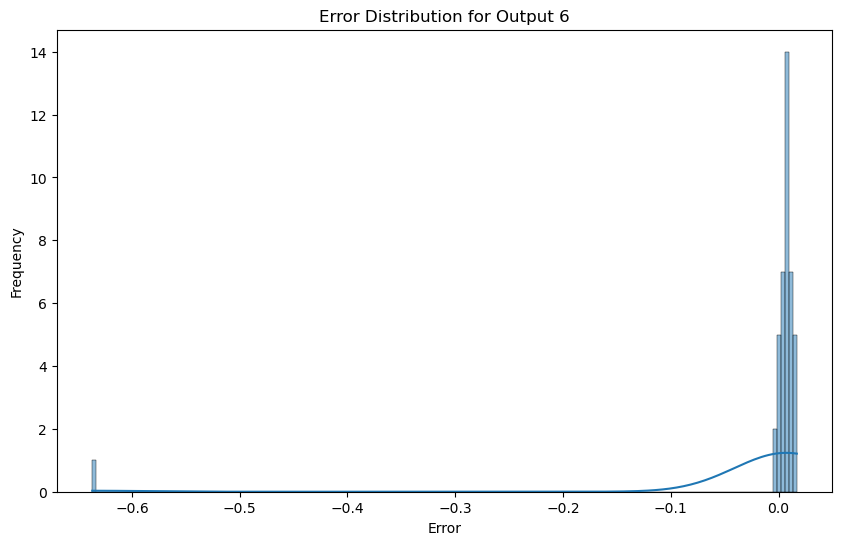

In [5]:
import os
import json
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, Multiply, BatchNormalization, TimeDistributed, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.metrics import AUC, MeanAbsoluteError
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import joblib

# Assuming each image is 256x256 pixels with 3 color channels (RGB)
input_shape = (256, 256, 3)
num_outputs = 6  # 1 for the number of axes + 5 for the attribute values

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Path to the dataset and metadata file
dataset_path = "radarcharts_geridvaluesdotentity/"
metadata_path = os.path.join(dataset_path, "metadata.json")

# Load metadata
with open(metadata_path, 'r') as json_file:
    metadata = json.load(json_file)['data']

# Extract all attribute values again
all_attribute_values = [attr['Value'] for item in metadata for attr in item['Attribute Data']]

# Convert to numpy array again
all_attribute_values_np = np.array(all_attribute_values).reshape(-1, 1)

# Initialize MinMaxScaler and fit to all attribute values
scaler = MinMaxScaler()
scaler.fit(all_attribute_values_np)

# Save the fitted MinMaxScaler to a file for future use
scaler_filename = "minmax_scaler.save"
joblib.dump(scaler, scaler_filename)

# Output the path to the saved scaler file
scaler_filename

# Initialize lists to store data and labels
data = []
labels = []

# Load dataset and preprocess labels
for item in metadata:
    image_name = item['Image Name']
    image_path = os.path.join(dataset_path, image_name)
    image = load_img(image_path, target_size=(256, 256))
    image = img_to_array(image)
    image /= 255.0  # Normalize to [0, 1]
    data.append(image)

    # Determine the number of axes
    num_axes = len(item['Attribute Data'])

    attribute_values = [attr['Value'] for attr in item['Attribute Data']]
   
    # Convert attribute_values to a NumPy array before normalization
    attribute_values = np.array(attribute_values).reshape(-1, 1)
    # Min-Max normalization using the pre-fitted scaler
    attribute_values_normalized = scaler.transform(attribute_values).flatten()
    # Combine number of axes and attribute values
    label = [num_axes] + attribute_values_normalized.tolist() + [0] * (5 - num_axes)
    labels.append(label)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split the dataset into training, validation, and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.67, random_state=42)

# Check the length of data and labels
print(f"Length of data: {len(data)}")
print(f"Length of labels: {len(labels)}")  # Corrected from preprocessed_labels to labels
# Check the shapes of the splits
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

def create_attention_module(feature_map, input_channels, ratio=8):
    # Squeeze operation
    squeeze = GlobalAveragePooling2D()(feature_map)

    # Excitation operation
    excitation = Dense(units=input_channels // ratio, activation='relu')(squeeze)
    excitation = Dense(units=input_channels, activation='sigmoid')(excitation)
    excitation = tf.reshape(excitation, [-1, 1, 1, input_channels])

    # Scale the input feature map
    scale = Multiply()([feature_map, excitation])

    return scale

def build_cnn_with_attention(input_shape, num_outputs):
    # Load the base VGG16 model
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the layers of the base_model
    base_model.trainable = False
    
    # Apply attention module to the last convolutional feature maps of VGG16
    last_conv_layer = base_model.get_layer('block5_conv3').output  # This is the last conv layer in VGG16
    attention_layer = create_attention_module(last_conv_layer, input_channels=512)  # Adjusted to VGG16's last conv layer channels
    
    # Continue from the attention layer
    gap_layer = GlobalAveragePooling2D()(attention_layer)  # Global Average Pooling after attention
    
    # Classifier
    x = Dense(256, activation='relu')(gap_layer)
    x = Dropout(0.5)(x)
    outputs = Dense(num_outputs)(x)  # Assuming a classification task
    
    # Creating the full model
    model = Model(inputs=base_model.input, outputs=outputs)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',  # Use Mean Squared Error for regression
              metrics=[tf.keras.metrics.MeanAbsoluteError()])  # Use MAE for evaluation
    
    return model

# Assuming each image is 256x256 pixels with 3 color channels (RGB)
input_shape = (256, 256, 3)
num_outputs = 6  # 1 for the number of axes + 5 for the attribute values

# Build the model
cnn_model = build_cnn_with_attention(input_shape, num_outputs)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)
tensorboard = TensorBoard(log_dir='./logs')  # Assuming TensorBoard logs are stored in ./logs

# Summary of the model
cnn_model.summary()

# Fit the model with these variables for the corresponding outputs
history = cnn_model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping, model_checkpoint, reduce_lr, tensorboard]
)

# Load best model and evaluate
cnn_model.load_weights('best_model.h5')

# Evaluate the model
loss, mae = cnn_model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Mean Absolute Error: {mae}")

# Optionally, visualize the predictions vs. actual values
predictions = cnn_model.predict(x_test)
for i in range(min(len(predictions), 10)):  # Visualize first 10 predictions
    print(f"Actual: {y_test[i]}, Predicted: {predictions[i]}")
    
for i in range(num_outputs):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test[:, i], color='blue', label='Actual')
    plt.scatter(range(len(predictions)), predictions[:, i], color='red', label='Predicted', alpha=0.5)
    plt.title(f'Actual vs Predicted for Output {i+1}')
    plt.legend()
    plt.show()
    
# Calculate errors
errors = predictions - y_test

# Plotting the distribution of errors for each output
for i in range(num_outputs):
    plt.figure(figsize=(10, 6))
    sns.histplot(errors[:, i], kde=True)
    plt.title(f'Error Distribution for Output {i+1}')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.show()

# When you need to use the scaler in the future    
#scaler = joblib.load('minmax_scaler.joblib')

## Inference with the model

In [15]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import joblib

# Load the MinMaxScaler
scaler_filename = "minmax_scaler.save"
scaler = joblib.load(scaler_filename)

# Load the trained model
model = tf.keras.models.load_model('best_model.h5')

# Function to preprocess the image
def preprocess_image(image_path, target_size=(256, 256)):
    # Load and resize the image
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image /= 255.0  # Normalize the image to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to predict attributes from an image
def predict_attributes(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Predict the attributes
    predictions = model.predict(preprocessed_image)
    
    # Reverse the MinMaxScaler transformation
    num_axes = int(predictions[0, 0])  # The first element is the number of axes
    attribute_values_normalized = predictions[0, 1:num_axes+1]  # Extract normalized attribute values
    attribute_values = scaler.inverse_transform(attribute_values_normalized.reshape(-1, 1)).flatten()
    
    return num_axes, attribute_values

# Path to the radar chart image for inference
#radar_chart_path = "134_catholic.png"  # 3, 3.3314, 7.8154, 2.1419, 0, 0
#radar_chart_path = "133_simplex.png"  # 5, 839.9671, 817.53, 784.5875, 997.4236, 510.8641 
#radar_chart_path = "7_bilateral.png"  # 5, 99.6905, 79.8694, 47.7971, 90.8473, 86.5432
radar_chart_path = "49_neoclassic.png"  # 3, 94.796, 98.604, 99.5643, 0, 0

# Example usage
num_axes, attribute_values = predict_attributes(radar_chart_path)
print(f"Number of Axes: {num_axes}")
print(f"Attribute Values: {attribute_values}")

1/1 [==============================] - 0s 262ms/step
Number of Axes: 2
Attribute Values: [   -37727.777 -10437563.   ]


# OCR Approach with GUI

## Install dependencies

In [ ]:
cd "C:\Users\Arman Ahmed Khan\OneDrive\Desktop\Chawla\OCR-image-to-text"
pip install -r requirements.txt

## GUI

In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QHBoxLayout, QPushButton, QRadioButton, QLabel, QTextEdit, QFileDialog, QMessageBox
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap
import gradio as gr
import tensorflow as tf
import keras_ocr
import requests
import cv2
import os
import csv
import numpy as np
import pandas as pd
import huggingface_hub
from huggingface_hub import Repository
from datetime import datetime
import scipy.ndimage.interpolation as inter
import easyocr
import datasets
from datasets import load_dataset, Image
from PIL import Image as PILImage
from paddleocr import PaddleOCR
            
"""
Paddle OCR
"""
def ocr_with_paddle(img):
    finaltext = ''
    ocr = PaddleOCR(lang='en', use_angle_cls=True)
    # img_path = 'exp.jpeg'
    result = ocr.ocr(img)
    
    for i in range(len(result[0])):
        text = result[0][i][1][0]
        finaltext += ' '+ text
    return finaltext

"""
Keras OCR
"""
def ocr_with_keras(img):
    output_text = ''
    pipeline=keras_ocr.pipeline.Pipeline()
    images=[keras_ocr.tools.read(img)]
    predictions=pipeline.recognize(images)
    first=predictions[0]
    for text,box in first:
        output_text += ' '+ text
    return output_text

"""
easy OCR
"""
# gray scale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thresholding or Binarization
def thresholding(src):
    return cv2.threshold(src,127,255, cv2.THRESH_TOZERO)[1]
def ocr_with_easy(img):
    gray_scale_image=get_grayscale(img)
    thresholding(gray_scale_image)
    cv2.imwrite('image.png',gray_scale_image)
    reader = easyocr.Reader(['th','en'])
    bounds = reader.readtext('image.png',paragraph="False",detail = 0)
    bounds = ''.join(bounds)
    return bounds
        
"""
Generate OCR
"""

class OCRApp(QWidget):
    def __init__(self):
        super().__init__()
        self.title = 'Optical Character Recognition'
        self.left = 10
        self.top = 10
        self.width = 1280
        self.height = 720
        self.initUI()
    
    def initUI(self):
        self.setWindowTitle(self.title)
        self.setGeometry(self.left, self.top, self.width, self.height)
        
        mainLayout = QHBoxLayout()
        controlsLayout = QVBoxLayout()
        
        self.method_selection = QLabel("Select OCR Method:", self)
        controlsLayout.addWidget(self.method_selection)
        
        self.radio_paddle = QRadioButton("PaddleOCR")
        self.radio_easy = QRadioButton("EasyOCR")
        self.radio_keras = QRadioButton("KerasOCR")
        self.radio_paddle.setChecked(True)
        controlsLayout.addWidget(self.radio_paddle)
        controlsLayout.addWidget(self.radio_easy)
        controlsLayout.addWidget(self.radio_keras)
        
        self.btn_upload = QPushButton('Upload Image', self)
        self.btn_upload.clicked.connect(self.openFileNameDialog)
        controlsLayout.addWidget(self.btn_upload)
        
        # Image size display
        self.image_size_display = QLabel("Image size will be shown here.", self)
        controlsLayout.addWidget(self.image_size_display)
        
        mainLayout.addLayout(controlsLayout)
        
        # Image display with a fixed maximum size
        self.image_display = QLabel(self)
        self.image_display.setAlignment(Qt.AlignCenter)
        self.image_display.setMaximumSize(640, 480)  # Example fixed size
        mainLayout.addWidget(self.image_display)
        
        # OCR Output in QTextEdit
        self.ocr_output = QTextEdit("OCR Output will be displayed here.")
        self.ocr_output.setReadOnly(True)
        mainLayout.addWidget(self.ocr_output)

        self.setLayout(mainLayout)
    
    def openFileNameDialog(self):
        options = QFileDialog.Options()
        fileName, _ = QFileDialog.getOpenFileName(self, "QFileDialog.getOpenFileName()", "", "All Files (*);;JPEG (*.jpg; *.jpeg);;PNG (*.png)", options=options)
        if fileName:
            pixmap = QPixmap(fileName)
            screen_size = self.image_display.maximumSize()  # Use the maximum size for scaling
            if pixmap.width() > screen_size.width() or pixmap.height() > screen_size.height():
                pixmap = pixmap.scaled(screen_size.width(), screen_size.height(), Qt.KeepAspectRatio, Qt.SmoothTransformation)
            self.image_display.setPixmap(pixmap)
            self.performOCR(fileName)
            
            # Display image size
            image = PILImage.open(fileName)
            self.image_size_display.setText(f"Image Size: {image.width} x {image.height} pixels")
    
    def performOCR(self, img_path):
        method = ""
        if self.radio_paddle.isChecked():
            method = "PaddleOCR"
        elif self.radio_easy.isChecked():
            method = "EasyOCR"
        elif self.radio_keras.isChecked():
            method = "KerasOCR"

        # Example call to an OCR function (you need to adapt this to work with file paths)
        if method == "PaddleOCR":
            ocr_result = ocr_with_paddle(img_path)
        elif method == "EasyOCR":
            ocr_result = ocr_with_easy(cv2.imread(img_path))
        elif method == "KerasOCR":
            ocr_result = ocr_with_keras(img_path)
        
        self.ocr_output.setText(ocr_result)
    
if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = OCRApp()
    ex.show()
    sys.exit(app.exec_())

ModuleNotFoundError: No module named 'PyQt5'